In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/ESAA/movies_train.csv')

Mounted at /content/drive


In [3]:
df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [4]:
df.info() #데이터 타입 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [5]:
print(df.isnull().sum()) #결측치 있는 열 확인

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64


In [6]:
df['dir_prev_bfnum'] = df['dir_prev_bfnum'].fillna(0) #결측치 0으로 채우기
print(df['dir_prev_bfnum'].isnull().sum()) #채우고 결측치 수 다시 확인

0


In [7]:
#이상치 확인
Q1 = df['box_off_num'].quantile(0.25)
Q3 = df['box_off_num'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['box_off_num'] < lower) | (df['box_off_num'] > upper)]
out_num = outliers['box_off_num']

print(f'관객수 이상치 개수: {len(out_num)}')


관객수 이상치 개수: 97


In [8]:
df['release_time'] = pd.to_datetime(df['release_time']) #datetime형으로 변환
print(df.info()) #변환 여부 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           600 non-null    object        
 1   distributor     600 non-null    object        
 2   genre           600 non-null    object        
 3   release_time    600 non-null    datetime64[ns]
 4   time            600 non-null    int64         
 5   screening_rat   600 non-null    object        
 6   director        600 non-null    object        
 7   dir_prev_bfnum  600 non-null    float64       
 8   dir_prev_num    600 non-null    int64         
 9   num_staff       600 non-null    int64         
 10  num_actor       600 non-null    int64         
 11  box_off_num     600 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 56.4+ KB
None


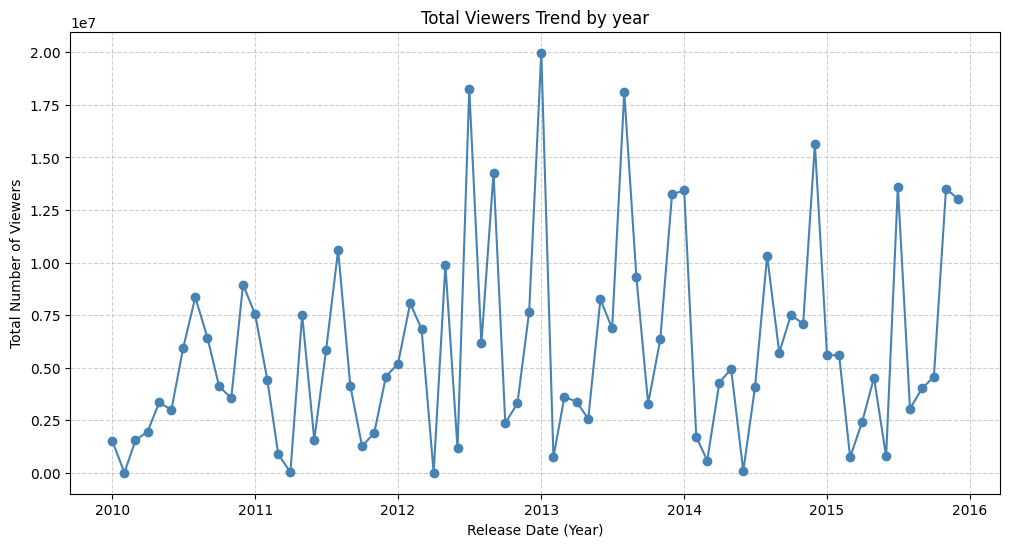

In [25]:
# 연도별 총 관객 수 집계
monthly_viewers = (
    df.groupby(df['release_time'].dt.to_period('M'))['box_off_num']
    .sum()
    .reset_index()
)

# datetime 변환 (to_period -> timestamp)
monthly_viewers['release_time'] = monthly_viewers['release_time'].dt.to_timestamp()

# 라인 차트
plt.figure(figsize=(12,6))
plt.plot(
    monthly_viewers['release_time'],
    monthly_viewers['box_off_num'],
    marker='o', linestyle='-', color='steelblue'
)
plt.title("Total Viewers Trend by year")
plt.xlabel("Release Date (Year)")
plt.ylabel("Total Number of Viewers")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

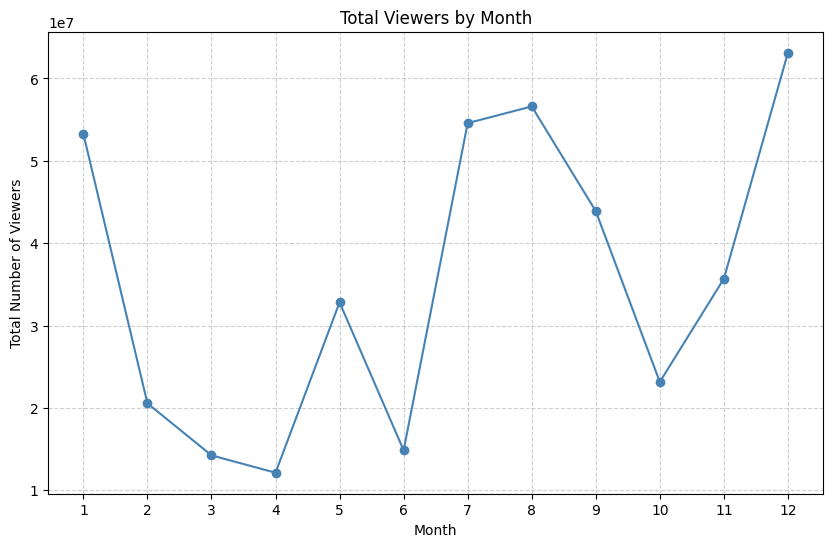

In [26]:
# 월별 총 관객 수 집계
monthly_viewers = (
    df.groupby(df['release_time'].dt.month)['box_off_num']
    .sum()
    .reset_index()
    .rename(columns={'release_time':'month'})
)

# 라인 차트
plt.figure(figsize=(10,6))
plt.plot(
    monthly_viewers['month'],
    monthly_viewers['box_off_num'],
    marker='o', linestyle='-', color='steelblue'
)
plt.title("Total Viewers by Month")
plt.xlabel("Month")
plt.ylabel("Total Number of Viewers")
plt.xticks(range(1,13))  # 1~12월 눈금 고정
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [9]:
df['genre'].unique()

array(['액션', '느와르', '코미디', '다큐멘터리', '뮤지컬', '드라마', '멜로/로맨스', '공포', '서스펜스',
       '애니메이션', '미스터리', 'SF'], dtype=object)

In [10]:
# 장르명 매핑 딕셔너리
genre_mapping = {
    '액션': 'Action',
    '느와르': 'Noir',
    '코미디': 'Comedy',
    '다큐멘터리': 'Documentary',
    '뮤지컬': 'Musical',
    '드라마': 'Drama',
    '멜로/로맨스': 'Melodrama/Romance',
    '공포': 'Horror',
    '서스펜스': 'Suspense',
    '애니메이션': 'Animation',
    '미스터리': 'Mystery',
    'SF': 'SF',
}

# 'genre' 열의 값을 딕셔너리에 따라 변경
df['genre'] = df['genre'].replace(genre_mapping)

# 변경된 결과 확인 (예시)
print(df['genre'].unique())

['Action' 'Noir' 'Comedy' 'Documentary' 'Musical' 'Drama'
 'Melodrama/Romance' 'Horror' 'Suspense' 'Animation' 'Mystery' 'SF']


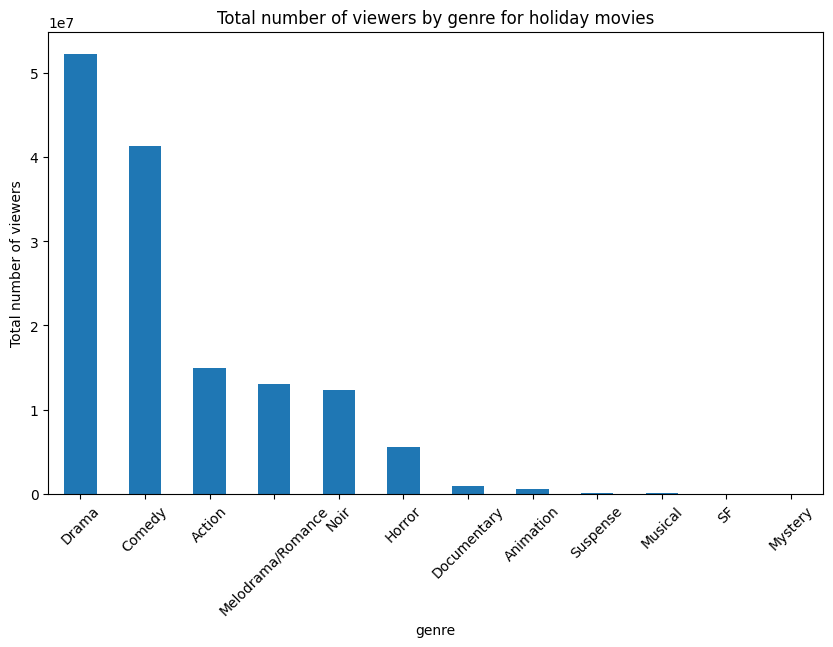

In [11]:
# 명절 필터링: 설(1~2월), 추석(9~10월)
df_holiday = df[df['release_time'].dt.month.isin([1,2,9,10])]

# 장르별 총 관객 수 집계
genre_counts = df_holiday.groupby('genre')['box_off_num'].sum().sort_values(ascending=False)

# 히스토그램(막대 그래프)
plt.figure(figsize=(10,6))
genre_counts.plot(kind='bar')
plt.title("Total number of viewers by genre for holiday movies")
plt.xlabel("genre")
plt.ylabel("Total number of viewers")
plt.xticks(rotation=45)
plt.show()


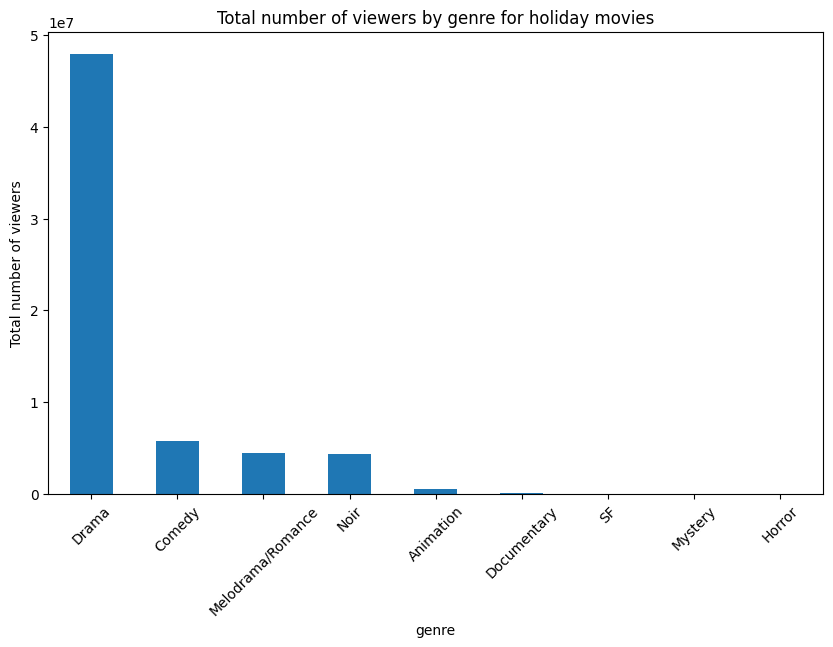

In [13]:
# 명절 필터링: 크리스마스
df_holiday = df[df['release_time'].dt.month.isin([12])]

# 장르별 총 관객 수 집계
genre_counts = df_holiday.groupby('genre')['box_off_num'].sum().sort_values(ascending=False)

# 히스토그램(막대 그래프)
plt.figure(figsize=(10,6))
genre_counts.plot(kind='bar')
plt.title("Total number of viewers by genre for holiday movies")
plt.xlabel("genre")
plt.ylabel("Total number of viewers")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-3085810556.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(3, 'box_off_num'))


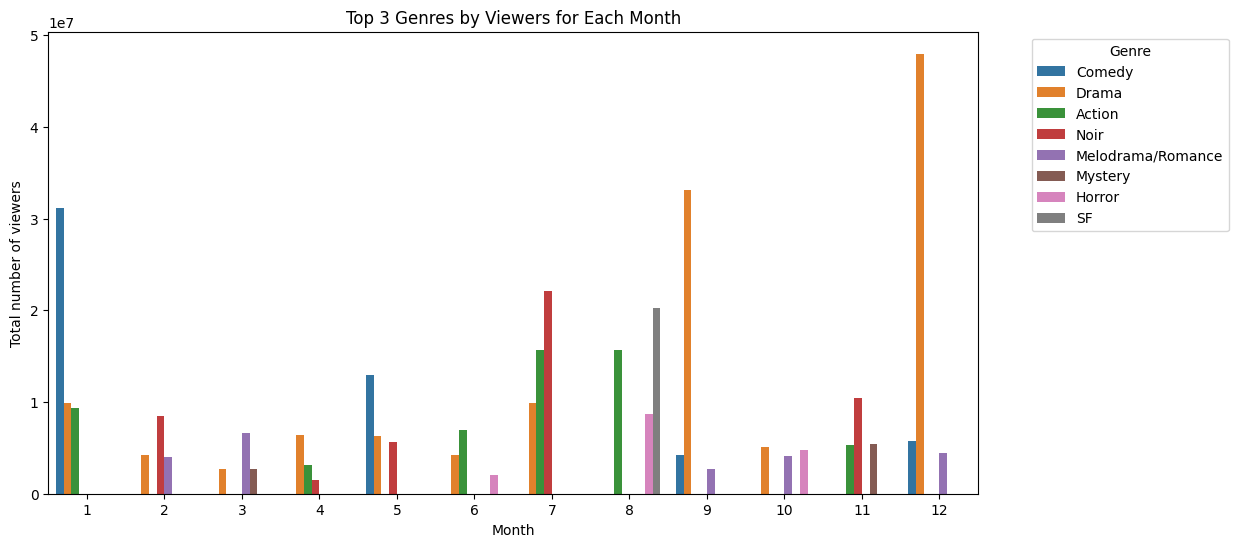

In [16]:
import seaborn as sns

# 월 컬럼 추가
df['month'] = df['release_time'].dt.month

# 월별-장르별 총 관객 수 집계
monthly_genre = (
    df.groupby(['month', 'genre'])['box_off_num']
    .sum()
    .reset_index()
)

# 각 월별 Top3 장르만 추리기
top3_monthly = (
    monthly_genre.groupby('month', group_keys=False)
    .apply(lambda x: x.nlargest(3, 'box_off_num'))
)

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top3_monthly,
    x='month',
    y='box_off_num',
    hue='genre'
)
plt.title("Top 3 Genres by Viewers for Each Month")
plt.xlabel("Month")
plt.ylabel("Total number of viewers")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

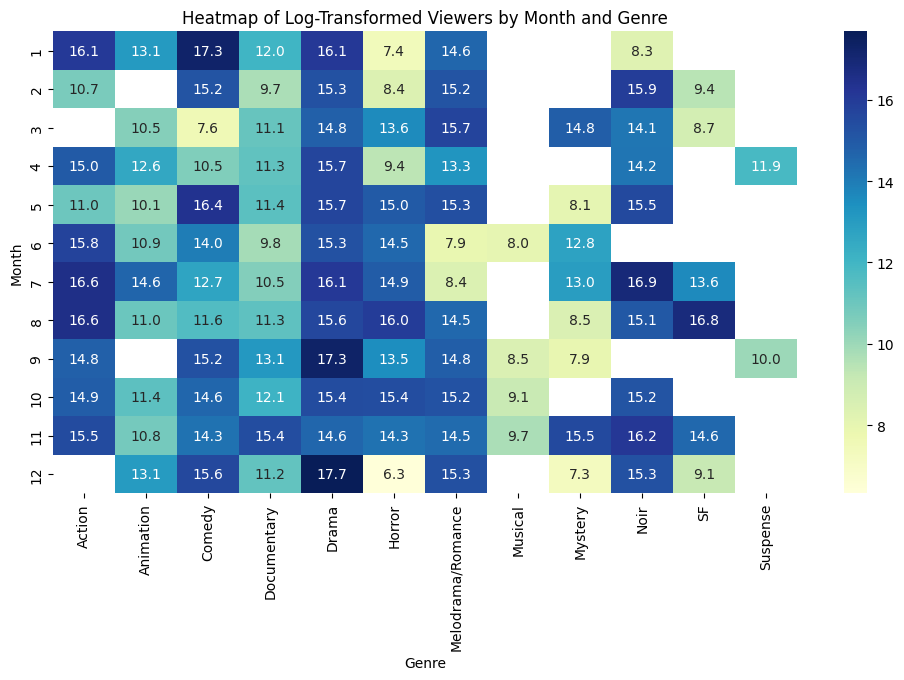

In [19]:
import numpy as np

pivot_log = df.pivot_table(
    index=df['release_time'].dt.month,
    columns='genre',
    values='box_off_num',
    aggfunc=lambda x: np.log1p(x.sum())  # log(1+x)
)

plt.figure(figsize=(12,6))
sns.heatmap(pivot_log, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title("Heatmap of Log-Transformed Viewers by Month and Genre")
plt.xlabel("Genre")
plt.ylabel("Month")
plt.show()